In [45]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("TensorFlow_FILES//DATA/cancer_classification.csv")

In [5]:
df.describe()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,benign_0__mal_1
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,0.627417
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,0.483918
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,0.000000
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,0.000000
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,1.000000
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,1.000000
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,1.000000


In [6]:
df.columns

Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error', 'fractal dimension error',
       'worst radius', 'worst texture', 'worst perimeter', 'worst area',
       'worst smoothness', 'worst compactness', 'worst concavity',
       'worst concave points', 'worst symmetry', 'worst fractal dimension',
       'benign_0__mal_1'],
      dtype='object')

<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

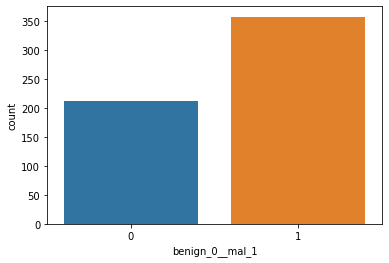

In [8]:
sns.countplot(x = "benign_0__mal_1", data = df)

<AxesSubplot:>

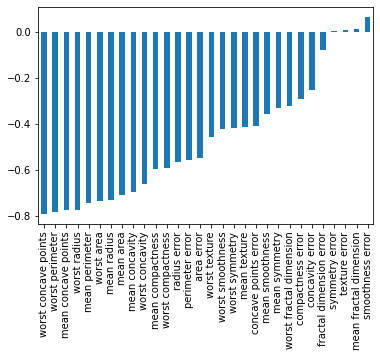

In [13]:
df.corr()["benign_0__mal_1"][:-1].sort_values().plot(kind = "bar")

<AxesSubplot:>

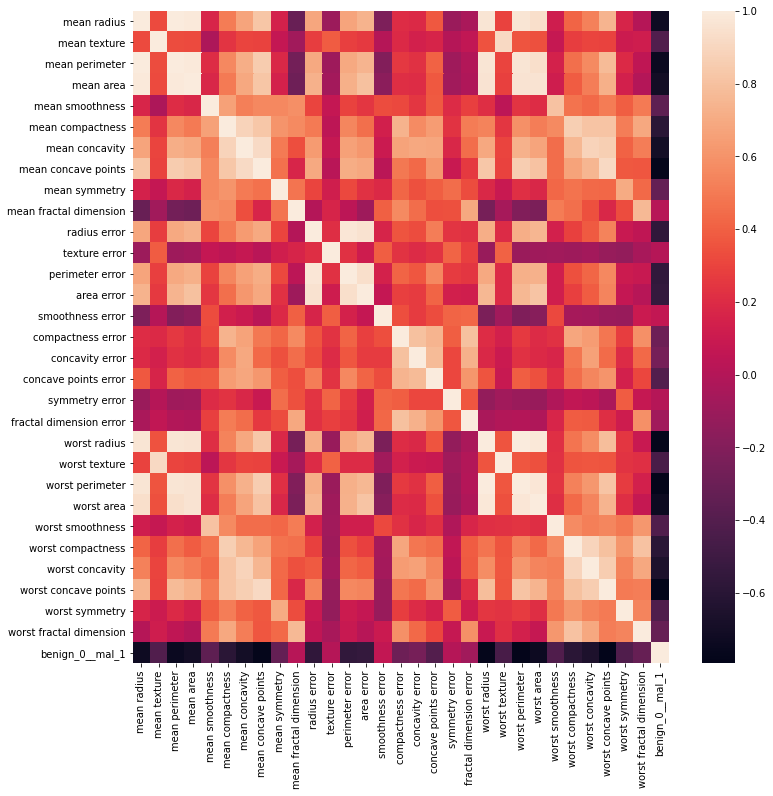

In [16]:
plt.figure(figsize = (12,12))
sns.heatmap(df.corr())

In [17]:
X = df.drop("benign_0__mal_1",axis = 1).values
y = df["benign_0__mal_1"].values

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)

In [20]:
from sklearn.preprocessing import MinMaxScaler

In [21]:
scaler = MinMaxScaler()

In [22]:
X_train = scaler.fit_transform(X_train)

In [23]:
X_test = scaler.transform(X_test)

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense, Dropout

In [27]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION activation = sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [28]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test))

Epoch 1/600
14/14 [==============================] - 1s 10ms/step - loss: 0.6863 - val_loss: 0.6683
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6547 - val_loss: 0.6375
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6212 - val_loss: 0.6014
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5851 - val_loss: 0.5642
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5466 - val_loss: 0.5233
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5076 - val_loss: 0.4818
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4680 - val_loss: 0.4400
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4275 - val_loss: 0.4002
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3924 - val_loss: 0.3660
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3565 - val_loss: 0.3311
Epoch 11

14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0883
Epoch 84/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0537 - val_loss: 0.0916
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0535 - val_loss: 0.0898
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0548 - val_loss: 0.0955
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0534 - val_loss: 0.0969
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0522 - val_loss: 0.0888
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0521 - val_loss: 0.0950
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0524 - val_loss: 0.0888
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0528 - val_loss: 0.0962
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0526 - val_loss: 0.0937
Epoch 93/600


14/14 [==============================] - 0s 2ms/step - loss: 0.0432 - val_loss: 0.1146
Epoch 165/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0407 - val_loss: 0.1044
Epoch 166/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0416 - val_loss: 0.1127
Epoch 167/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0404 - val_loss: 0.1032
Epoch 168/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0413 - val_loss: 0.1068
Epoch 169/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0393 - val_loss: 0.1075
Epoch 170/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0406 - val_loss: 0.1213
Epoch 171/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0401 - val_loss: 0.1044
Epoch 172/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.1188
Epoch 173/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0425 - val_loss: 0.1142
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0324 - val_loss: 0.1259
Epoch 246/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0308 - val_loss: 0.1251
Epoch 247/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0345 - val_loss: 0.1343
Epoch 248/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0300 - val_loss: 0.1156
Epoch 249/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0343 - val_loss: 0.1321
Epoch 250/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0329 - val_loss: 0.1270
Epoch 251/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0335 - val_loss: 0.1223
Epoch 252/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0325 - val_loss: 0.1253
Epoch 253/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0303 - val_loss: 0.1274
Epoch 254/600
14/14 [==============================] - 0s 1ms/step - loss: 0.0300 - val_loss: 0.1189
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0244 - val_loss: 0.1447
Epoch 327/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0239 - val_loss: 0.1309
Epoch 328/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0232 - val_loss: 0.1441
Epoch 329/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0279 - val_loss: 0.1323
Epoch 330/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0241 - val_loss: 0.1380
Epoch 331/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1294
Epoch 332/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0233 - val_loss: 0.1408
Epoch 333/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.1357
Epoch 334/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0228 - val_loss: 0.1392
Epoch 335/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0227 - val_loss: 0.1405
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0168 - val_loss: 0.1534
Epoch 408/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.1555
Epoch 409/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0174 - val_loss: 0.1476
Epoch 410/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.1452
Epoch 411/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0177 - val_loss: 0.1421
Epoch 412/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0181 - val_loss: 0.1777
Epoch 413/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0223 - val_loss: 0.1333
Epoch 414/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0205 - val_loss: 0.1636
Epoch 415/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0172 - val_loss: 0.1447
Epoch 416/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0199 - val_loss: 0.1358
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0217 - val_loss: 0.1758
Epoch 489/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0139 - val_loss: 0.1736
Epoch 490/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0130 - val_loss: 0.1596
Epoch 491/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.1726
Epoch 492/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0124 - val_loss: 0.1587
Epoch 493/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0128 - val_loss: 0.1626
Epoch 494/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0117 - val_loss: 0.1618
Epoch 495/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0116 - val_loss: 0.1622
Epoch 496/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1769
Epoch 497/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0118 - val_loss: 0.1514
Epoc

14/14 [==============================] - 0s 2ms/step - loss: 0.0082 - val_loss: 0.1777
Epoch 570/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0085 - val_loss: 0.1884
Epoch 571/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0111 - val_loss: 0.2328
Epoch 572/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0159 - val_loss: 0.1646
Epoch 573/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0081 - val_loss: 0.1842
Epoch 574/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.1852
Epoch 575/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.1642
Epoch 576/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.1759
Epoch 577/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0078 - val_loss: 0.1776
Epoch 578/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0080 - val_loss: 0.1779
Epoc

In [30]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

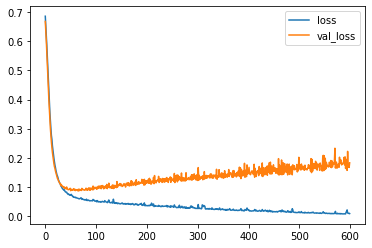

In [31]:
losses.plot()

In [32]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dense(15,activation = 'relu'))

#BINARY CLASSIFICATION activation = sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [33]:
from tensorflow.keras.callbacks import EarlyStopping

In [34]:
help(EarlyStopping)

Help on class EarlyStopping in module tensorflow.python.keras.callbacks:

class EarlyStopping(Callback)
 |  EarlyStopping(monitor='val_loss', min_delta=0, patience=0, verbose=0, mode='auto', baseline=None, restore_best_weights=False)
 |  
 |  Stop training when a monitored metric has stopped improving.
 |  
 |  Assuming the goal of a training is to minimize the loss. With this, the
 |  metric to be monitored would be `'loss'`, and mode would be `'min'`. A
 |  `model.fit()` training loop will check at end of every epoch whether
 |  the loss is no longer decreasing, considering the `min_delta` and
 |  `patience` if applicable. Once it's found no longer decreasing,
 |  `model.stop_training` is marked True and the training terminates.
 |  
 |  The quantity to be monitored needs to be available in `logs` dict.
 |  To make it so, pass the loss or metrics at `model.compile()`.
 |  
 |  Args:
 |    monitor: Quantity to be monitored.
 |    min_delta: Minimum change in the monitored quantity
 | 

In [35]:
early_stop = EarlyStopping(monitor = 'val_loss', mode = 'min',verbose = 1, patience = 25)

In [36]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 9ms/step - loss: 0.6793 - val_loss: 0.6600
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6437 - val_loss: 0.6304
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6132 - val_loss: 0.6014
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5830 - val_loss: 0.5710
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5511 - val_loss: 0.5379
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5175 - val_loss: 0.5020
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4809 - val_loss: 0.4596
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.4344 - val_loss: 0.4025
Epoch 9/600
14/14 [==============================] - 0s 3ms/step - loss: 0.3830 - val_loss: 0.3528
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.3396 - val_loss: 0.3136
Epoch 11/

<AxesSubplot:>

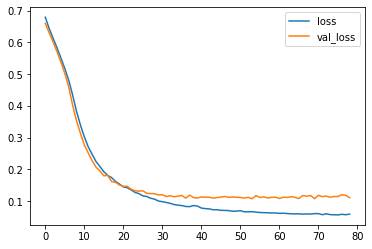

In [38]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [39]:
#Dropout

In [40]:
model = Sequential()
model.add(Dense(30,activation = 'relu'))
model.add(Dropout(0.5))

model.add(Dense(15,activation = 'relu'))
model.add(Dropout(0.5))

#BINARY CLASSIFICATION activation = sigmoid
model.add(Dense(1, activation = 'sigmoid'))

model.compile(loss = 'binary_crossentropy', optimizer = 'adam')

In [41]:
model.fit(x = X_train, y = y_train, epochs = 600, validation_data = (X_test, y_test), callbacks = [early_stop])

Epoch 1/600
14/14 [==============================] - 0s 8ms/step - loss: 0.7047 - val_loss: 0.6782
Epoch 2/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6706 - val_loss: 0.6447
Epoch 3/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6515 - val_loss: 0.6138
Epoch 4/600
14/14 [==============================] - 0s 2ms/step - loss: 0.6291 - val_loss: 0.5876
Epoch 5/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5983 - val_loss: 0.5561
Epoch 6/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5886 - val_loss: 0.5290
Epoch 7/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5545 - val_loss: 0.5020
Epoch 8/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5452 - val_loss: 0.4757
Epoch 9/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5253 - val_loss: 0.4537
Epoch 10/600
14/14 [==============================] - 0s 2ms/step - loss: 0.5050 - val_loss: 0.4249
Epoch 11/

Epoch 83/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1192 - val_loss: 0.1174
Epoch 84/600
14/14 [==============================] - 0s 1ms/step - loss: 0.1210 - val_loss: 0.1196
Epoch 85/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1377 - val_loss: 0.1188
Epoch 86/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1211 - val_loss: 0.1132
Epoch 87/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1049 - val_loss: 0.1196
Epoch 88/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1019 - val_loss: 0.1120
Epoch 89/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0920 - val_loss: 0.1184
Epoch 90/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1171 - val_loss: 0.1232
Epoch 91/600
14/14 [==============================] - 0s 2ms/step - loss: 0.0885 - val_loss: 0.1195
Epoch 92/600
14/14 [==============================] - 0s 2ms/step - loss: 0.1147 - val_loss: 0.1168


In [42]:
model_loss = pd.DataFrame(model.history.history)

<AxesSubplot:>

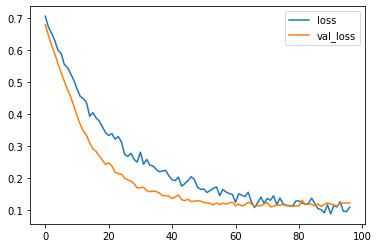

In [43]:
model_loss.plot()

In [47]:
predictions = model.predict_classes(X_test)

In [48]:
from sklearn.metrics import classification_report, confusion_matrix

In [49]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.92      0.98      0.95        55
           1       0.99      0.94      0.97        88

    accuracy                           0.96       143
   macro avg       0.95      0.96      0.96       143
weighted avg       0.96      0.96      0.96       143



In [50]:
print(confusion_matrix(y_test, predictions))

[[54  1]
 [ 5 83]]
